<a href="https://colab.research.google.com/github/luuvu1396/DA_CODEgym/blob/main/%5BTh%E1%BB%B1c_h%C3%A0nh%5D_Ph%C3%A2n_t%C3%ADch_s%E1%BB%B1_bi%E1%BA%BFn_%C4%91%E1%BB%95i_s%E1%BB%91_l%C6%B0%E1%BB%A3ng_%C4%91%C6%A1n_h%C3%A0ng_theo_th%E1%BB%9Di_gian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [30]:
df = pd.read_csv("/content/OnlineRetail.csv",encoding = "ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [31]:
# Chọn mục tiêu "Vẽ biểu đồ đường" thể hiện xu hướng thay đổi
# "số lượng đơn hàng" theo thời gian trong năm "2011".
# "Vẽ biểu đồ" cột so sánh "số lượng đơn hàng" trong "các tháng" của "năm 2011".

In [32]:
df["month"]= pd.to_datetime(df["InvoiceDate"],format = '%m/%d/%Y %H:%M').dt.month
df["year"]= pd.to_datetime(df["InvoiceDate"],format = '%m/%d/%Y %H:%M').dt.year
target = df[df["year"] == 2011]
target

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom,1,2011
42482,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom,1,2011
42483,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom,1,2011
42484,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom,1,2011
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom,1,2011
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,12,2011


In [33]:
target1 = target[["InvoiceNo","month"]]
target1

,InvoiceNo,month
42481,539993,1
42482,539993,1
42483,539993,1
42484,539993,1
42485,539993,1
...,...,...
541904,581587,12
541905,581587,12
541906,581587,12
541907,581587,12


In [58]:
group1= target1.groupby(by=["month","InvoiceNo"]).agg({'InvoiceNo': 'nunique'})
group1

InvoiceNo
month InvoiceNo           
1     539993             1
      539994             1
      539995             1
      539996             1
      539997             1
...                    ...
12    C581484            1
      C581490            1
      C581499            1
      C581568            1
      C581569            1

[23875 rows x 1 columns]

In [79]:
group2= group1.pivot_table(values=["InvoiceNo"], index = ["month"], aggfunc= "sum")
group2.reset_index(inplace=True)
group2

,month,InvoiceNo
0,1,1476
1,2,1393
2,3,1983
3,4,1744
4,5,2162
5,6,2012
6,7,1927
7,8,1737
8,9,2327
9,10,2637


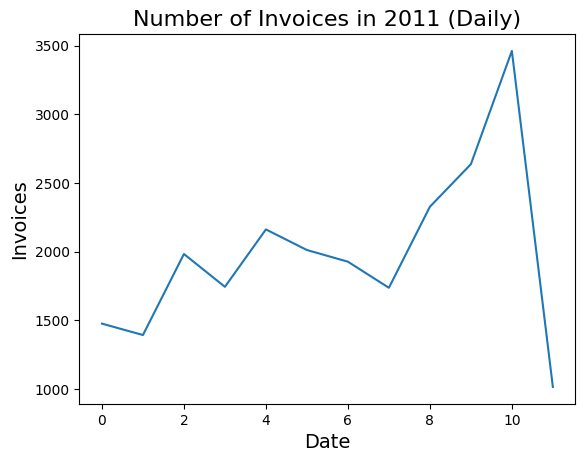

In [80]:
plt.plot(group2["InvoiceNo"])
plt.title('Number of Invoices in 2011 (Daily)', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Invoices', fontsize = 14)
plt.show()

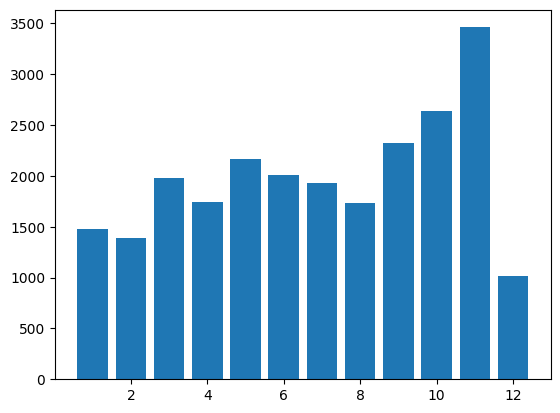

In [81]:
plt.bar(group2["month"],group2["InvoiceNo"])
plt.show()

Nhận xét:

3 tháng 9, 10, 11 có số lượng đơn hàng tăng đáng kể, trong đó tháng 11 có số đơn hàng cao nhất.
Tháng 12 có tổng số lượng đơn hàng thấp nhất.